<a href="https://colab.research.google.com/github/CristianRiquelmeF/Ciencia-de-datos/blob/main/Trabajo3/EDA_Correlaci%C3%B3n_y_Modelo_de_Regresi%C3%B3n_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 34.7 MB/s 


In [ ]:
import pyreadstat
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
casen, meta = pyreadstat.read_sav("/content/drive/MyDrive/BBDD/Casen 2017.sav", apply_value_formats = True)

In [ ]:
casen.shape

(216439, 804)

In [ ]:
etiquetas = pd.DataFrame(list((meta.column_names_to_labels).items()), columns=['Columna', 'Etiqueta'])

tipos= pd.DataFrame(casen.dtypes, columns= ['Tipos'])
tipos['Columna'] = tipos.index
tipos= tipos.reset_index(drop= True)

dicc_datos= pd.merge(etiquetas, tipos, on= 'Columna')
dicc_datos

,Columna,Etiqueta,Tipos
0,folio,Identificación hogar (comuna area seg viv hogar),float64
1,o,Orden,float64
2,id_vivienda,Identificador de la vivienda (comuna area seg ...,float64
3,hogar,Identificación del hogar en la vivienda,float64
4,region,Región,category
...,...,...,...
799,hh_d_appart,Hogar carente en apoyo y participación social,float64
800,hh_d_tsocial,Hogar carente en trato igualitario,float64
801,hh_d_seg,Hogar carente en seguridad,float64
802,pobreza_multi_4d,Situación de pobreza multidimensional (4 dimen...,category


#Selección de variables y creación de base nueva

In [ ]:
# ytrabajocor = ingresos
# Edad
# v1= ¿Cuál es el tipo de vivienda que ocupa el entrevistado?
# v9= Su hogar, ¿bajo qué situación ocupa el sitio?
# numper= Número de personas en el hogar (excluye sdpa, servicio domestico puertas adentro)
# ecivil=	Estado civil
# esc=	Escolaridad
# oficio1= Oficio
# activ = actividad economica
# o10= ¿Cuántas horas trabaja habitualmente por semana en su trabajo, negocio

data1= casen[['ytrabajocor','edad','v1','v9','numper','ecivil','esc','oficio1','activ','o10']]

In [ ]:
#Filtrar a las personas ocupadas (laboralmente)
data1= data1[data1.activ== "Ocupados"]
pd.crosstab(index= data1['activ'], columns=['N'])
data1= data1.drop(columns=['activ'])

data1= data1.dropna()

data1

,ytrabajocor,edad,v1,v9,numper,ecivil,esc,oficio1,o10
0,250000.0,56.0,Casa pareada por ambos lados,Arrendado sin contrato,1.0,Soltero(a),12.0,Trabajadores no calificado,8.0
1,200000.0,21.0,Casa pareada por ambos lados,Arrendado sin contrato,1.0,Soltero(a),7.0,Trabajadores no calificado,59.0
2,281750.0,24.0,Casa pareada por ambos lados,Arrendado sin contrato,2.0,Conviviente o pareja sin acuerdo de unión civil,12.0,Trabajadores de los servicios y vendedores de ...,8.0
3,311750.0,28.0,Casa pareada por ambos lados,Arrendado sin contrato,2.0,Conviviente o pareja sin acuerdo de unión civil,12.0,Trabajadores de los servicios y vendedores de ...,8.0
4,341667.0,26.0,Casa pareada por ambos lados,Arrendado sin contrato,3.0,Casado(a),15.0,Trabajadores no calificado,8.0
...,...,...,...,...,...,...,...,...,...
216428,562500.0,40.0,Casa aislada (no pareada),Propio pagado,2.0,Conviviente o pareja sin acuerdo de unión civil,8.0,Agricultores y trabajadores calificados agrope...,48.0
216429,150000.0,40.0,Casa aislada (no pareada),Propio pagado,2.0,Conviviente o pareja sin acuerdo de unión civil,8.0,Trabajadores no calificado,22.0
216435,200000.0,64.0,Casa aislada (no pareada),Propio pagado,2.0,Casado(a),4.0,Trabajadores no calificado,25.0
216437,250000.0,60.0,Casa aislada (no pareada),Propio pagado,2.0,Casado(a),3.0,Agricultores y trabajadores calificados agrope...,60.0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89663 entries, 0 to 216438
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ytrabajocor  89663 non-null  float64 
 1   edad         89663 non-null  float64 
 2   v1           89663 non-null  category
 3   v9           89663 non-null  category
 4   numper       89663 non-null  float64 
 5   ecivil       89663 non-null  category
 6   esc          89663 non-null  float64 
 7   oficio1      89663 non-null  category
 8   o10          89663 non-null  category
dtypes: category(5), float64(4)
memory usage: 3.9 MB


In [ ]:
pd.crosstab(index= data1['v1'], columns=['N'])

col_0,N
v1,
Casa aislada (no pareada),43764
Casa pareada por ambos lados,11586
Casa pareada por un lado,24062
Departamento en edificio con ascensor,3435
Departamento en edificio sin ascensor,5745
"Mediagua, mejora o vivienda de emergencia",472
Pieza en casa antigua o conventillo,386
Rancho o choza,137
"Vivienda precaria de materiales reutilizados (latas, plástic",64


In [ ]:
pd.crosstab(index= data1['v9'], columns=['N'])

col_0,N
v9,
Arrendado con contrato,12805
Arrendado sin contrato,6270
Cedido por familiar u otro,11699
Cedido por servicio o trabajo,2162
No responde,1
Ocupación irregular (de hecho),552
Poseedor irregular,420
Propio compartido (pagado) con otras viviendas del sitio,669
Propio compartido (pagándose) con otras viviendas del sitio,301


In [ ]:
pd.crosstab(index= data1['ecivil'], columns=['N'])

col_0,N
ecivil,
Anulado(a),112
Casado(a),32126
Conviviente civil (con acuerdo de unión civil),243
Conviviente o pareja sin acuerdo de unión civil,18793
Divorciado (a),2060
Separado(a),5752
Soltero(a),28618
Viudo(a),1959


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89663 entries, 0 to 216438
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ytrabajocor  89663 non-null  float64 
 1   edad         89663 non-null  float64 
 2   v1           89663 non-null  category
 3   v9           89663 non-null  category
 4   numper       89663 non-null  float64 
 5   ecivil       89663 non-null  category
 6   esc          89663 non-null  float64 
 7   oficio1      89663 non-null  category
 8   o10          89663 non-null  category
dtypes: category(5), float64(4)
memory usage: 3.9 MB


#Análisis exploratorio de datos

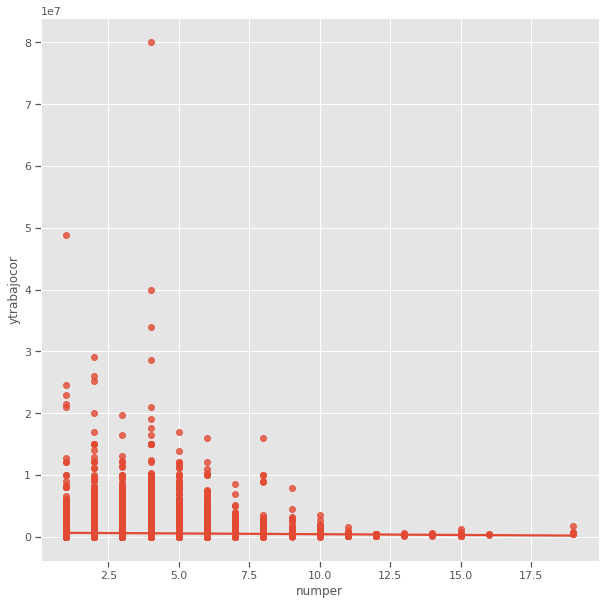

In [ ]:
# Relación de número de personas en hogar con salarios
sns.regplot(x="numper", y="ytrabajocor", data=data1)

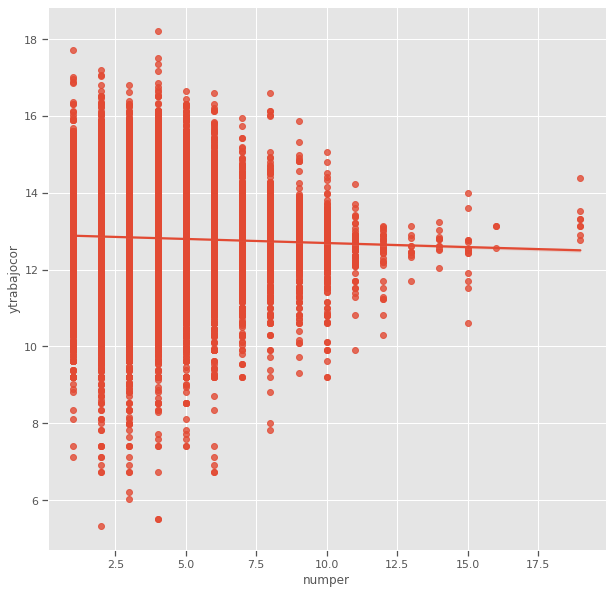

In [ ]:
sns.regplot(y= np.log(data1['ytrabajocor']), x=data1['numper'])

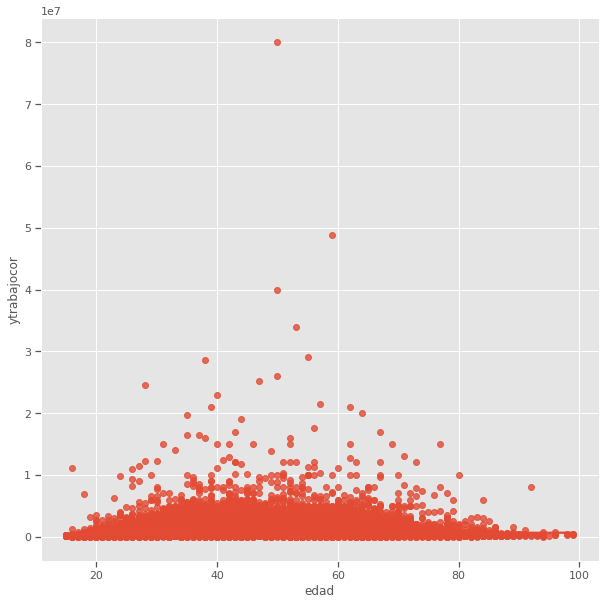

In [ ]:
# Relación de edad con salario
sns.regplot(x="edad", y="ytrabajocor", data=data1)

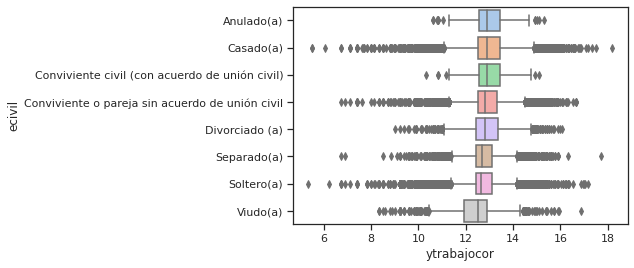

In [ ]:
# Relación Estado civil con salario
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x=np.log(data1["ytrabajocor"]), y="ecivil", data=data1)

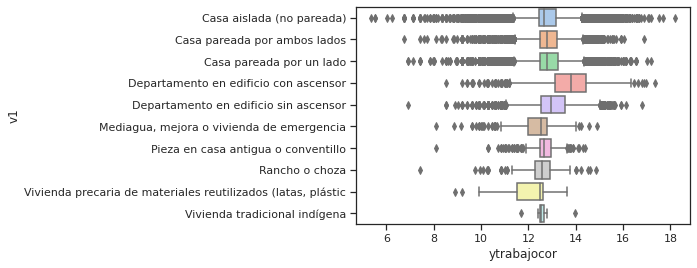

In [ ]:
# Relación Tipo de vivienda con salario
sns.boxplot(x=np.log(data1["ytrabajocor"]), y="v1", data=data1)


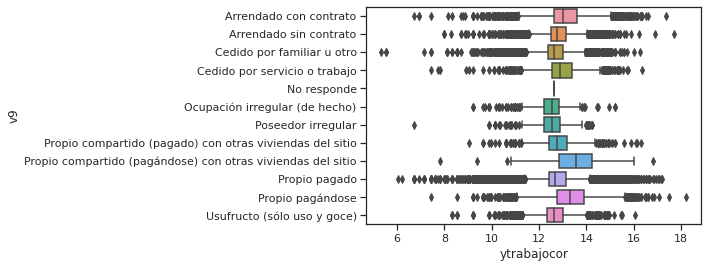

In [ ]:
# Relación tipo de ocupación del hogar y salario.
sns.boxplot(x=np.log(data1["ytrabajocor"]), y="v9", data=data1)

#Modelo de Regresión Lineal Múltiple

In [ ]:
#Estimación del modelo de Regresión Lineal
formula= 'ytrabajocor~edad+esc+numper+C(v1)+C(v9)+C(oficio1)'

In [ ]:
#Aplicación
modelo1= smf.ols(formula=formula, data=data1)
res= modelo1.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:            ytrabajocor   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     669.9
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        04:43:38   Log-Likelihood:            -1.3384e+06
No. Observations:               89663   AIC:                         2.677e+06
Df Residuals:                   89629   BIC:                         2.677e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [ ]:
#Valores sin notación cientifica
print(round(pd.DataFrame(res.params), 2))

                                                            0
Intercept                                          -243543.58
C(v1)[T.Casa pareada por ambos lados]               -51588.88
C(v1)[T.Casa pareada por un lado]                   -47851.82
C(v1)[T.Departamento en edificio con ascensor]      443331.77
C(v1)[T.Departamento en edificio sin ascensor]       -9429.45
C(v1)[T.Mediagua, mejora o vivienda de emergencia]   -1910.50
C(v1)[T.Pieza en casa antigua o conventillo]        -22898.72
C(v1)[T.Rancho o choza]                             -23846.78
C(v1)[T.Vivienda precaria de materiales reutili...  -34932.33
C(v1)[T.Vivienda tradicional indígena]              -63707.13
C(v9)[T.Arrendado sin contrato]                     -28406.94
C(v9)[T.Cedido por familiar u otro]                 -92811.89
C(v9)[T.Cedido por servicio o trabajo]               76380.28
C(v9)[T.No responde]                                106301.53
C(v9)[T.Ocupación irregular (de hecho)]             -48598.91
C(v9)[T.

#Normalizar datos atípicos, puntajes Z

In [ ]:
#Creando data con puntaje Z agregado
data1['puntaje_Z'] = (data1['ytrabajocor'] - data1['ytrabajocor'].mean())/data1['ytrabajocor'].std(ddof=0)
data1.head(5)

,ytrabajocor,edad,v1,v9,numper,ecivil,esc,oficio1,o10,puntaje_Z
0,250000.0,56.0,Casa pareada por ambos lados,Arrendado sin contrato,1.0,Soltero(a),12.0,Trabajadores no calificado,8.0,-0.358579
1,200000.0,21.0,Casa pareada por ambos lados,Arrendado sin contrato,1.0,Soltero(a),7.0,Trabajadores no calificado,59.0,-0.419463
2,281750.0,24.0,Casa pareada por ambos lados,Arrendado sin contrato,2.0,Conviviente o pareja sin acuerdo de unión civil,12.0,Trabajadores de los servicios y vendedores de ...,8.0,-0.319917
3,311750.0,28.0,Casa pareada por ambos lados,Arrendado sin contrato,2.0,Conviviente o pareja sin acuerdo de unión civil,12.0,Trabajadores de los servicios y vendedores de ...,8.0,-0.283386
4,341667.0,26.0,Casa pareada por ambos lados,Arrendado sin contrato,3.0,Casado(a),15.0,Trabajadores no calificado,8.0,-0.246956


count    84075.0
mean        -0.0
std          0.0
min         -1.0
25%         -0.0
50%         -0.0
75%         -0.0
max          1.0
Name: puntaje_Z, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


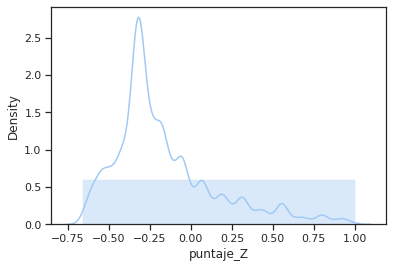

In [ ]:
data2=data1[data1['puntaje_Z']<=1]
print(round(data2['puntaje_Z'].describe(include=all)))
sns.distplot(data2['puntaje_Z'], bins=1)

In [ ]:
#Implementando nuevamente el modelo
modelo2= smf.ols(formula=formula, data= data2)
res2= modelo2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:            ytrabajocor   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     1160.
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        04:43:40   Log-Likelihood:            -1.1517e+06
No. Observations:               84075   AIC:                         2.304e+06
Df Residuals:                   84041   BIC:                         2.304e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [ ]:
print(round(pd.DataFrame(res2.params), 2))

                                                            0
Intercept                                           139888.31
C(v1)[T.Casa pareada por ambos lados]                11942.21
C(v1)[T.Casa pareada por un lado]                      556.02
C(v1)[T.Departamento en edificio con ascensor]       84147.18
C(v1)[T.Departamento en edificio sin ascensor]       20745.41
C(v1)[T.Mediagua, mejora o vivienda de emergencia]  -21949.55
C(v1)[T.Pieza en casa antigua o conventillo]          4442.80
C(v1)[T.Rancho o choza]                             -15589.45
C(v1)[T.Vivienda precaria de materiales reutili...  -46195.47
C(v1)[T.Vivienda tradicional indígena]                2524.45
C(v9)[T.Arrendado sin contrato]                     -28921.40
C(v9)[T.Cedido por familiar u otro]                 -58275.45
C(v9)[T.Cedido por servicio o trabajo]               41827.49
C(v9)[T.No responde]                                 41062.89
C(v9)[T.Ocupación irregular (de hecho)]             -56255.90
C(v9)[T.

**Interpretación del modelo:**

*  En un principio se había incluído la variable de estado civil, pero esta mostraba que no eran significativas para el modelo y al retirarla no variaba mas de 3 puntos el R-squared. El R-squared inicial fue de 0.198 y después de normalizar con puntaje z quedó en 0.313.La variable "numper" -número de personas dentro del hogar- no afecta siginificativamente en el salario percibido. La variable según el tipo de vivienda " departamento en edificio con acensor" gana 443.331 más que los demás tipos de vivienda en el modelo y luego de normalizar se modifica a 84.147. Según la varibale "tipo de ocupación del hogar" los casos de hogar propio compartido pagándose pasa de 173.589 de salario más que los demás y luego de normalizar pasa a 16.768. Además, propio pagado pasa de 173.455 a 35.077.   






In [ ]:
from statsmodels.compat import lzip

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

#Comprobación de supuestos

In [ ]:
#Normalidad de los residuos (Shapiro- Wilk)
from scipy import stats
shapiro_test = stats.shapiro(res2.resid)
shapiro_test

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9551979899406433, pvalue=0.0)

**Con un p-value debajo del 0.5 se rechaza hipótesis nula y los datos no presentan distribución normal.**

In [ ]:

plt.rc('figure', figsize=(10,10))
plt.style.use('ggplot')
probplot = sm.ProbPlot(res2.get_influence().resid_studentized_internal, fit=True)
fig = probplot.qqplot(line='45', marker='o', color='black',mfc='none')
plt.title('Normal Q-Q', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


RuntimeError: ignored

In [ ]:
# Multicolinealidad (Calcularemos el VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = modelo2.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif

[67.33354079261535,
 1.1320559422127017,
 1.18063115776539,
 1.141805899582856,
 1.1573779910688229,
 1.0231216358923014,
 1.035272689601622,
 1.0061202232329471,
 1.015844016580285,
 1.000441005983416,
 1.4830917347204948,
 1.8786873520945149,
 1.207604441576838,
 1.000195024788785,
 1.0752346645842492,
 1.0492305966172095,
 1.059119236604362,
 1.0277792257771174,
 2.670875319105477,
 1.5295772611713734,
 1.1744758310228927,
 2.4026438255407294,
 1.1136408032830487,
 1.706796940746947,
 3.318623681783143,
 2.5744717790571108,
 3.085243407281332,
 1.0538622918115808,
 3.566604781625583,
 4.236024476110044,
 2.913423849323672,
 1.2990313129216853,
 1.817114326459623,
 1.0922352056399363]

**Según el análisis vif se puede observar que sólo una variable está cercana a un valor 5 con un 4.2, lo que indicaría que sería la única variable del modelo a revisar.**

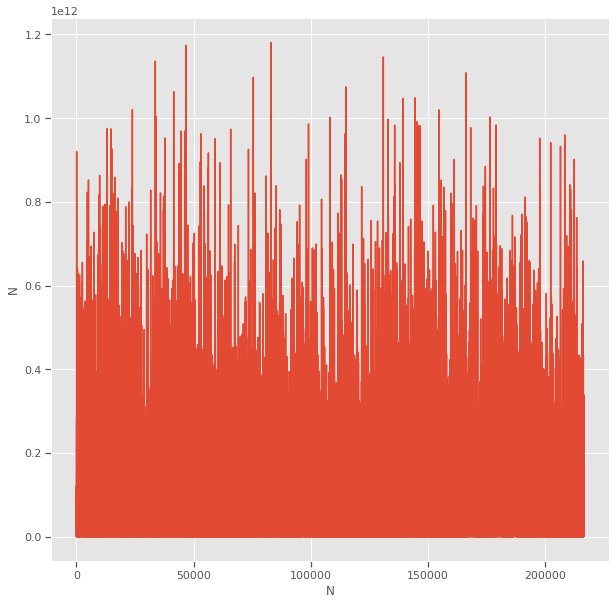

In [ ]:
#1 - Homocedasticidad de los residuos (diferencia entre lo estimado y lo real)
# Los residuos se deben distribuir de manera homogenea
# Analisis visual de la distribución de los errores (no cuadraticos)
plt.figure(1)
#plt.plot(res2.resid)
plt.plot(res2.resid**2)
plt.xlabel('N')
plt.ylabel('N')
plt.grid(True)
plt.show()

In [ ]:
# Heterocedasticidad (Test breusch pagan)
breuschpagan_p= sms.het_breuschpagan(res2.resid, res2.model.exog)[1]
print(breuschpagan_p)
if breuschpagan_p> 0.05:
  print("La relación no es heterocedástica")
if breuschpagan_p <0.05:
  print("La relación es heterocedastica")

0.0
La relación es heterocedastica


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Residuals')

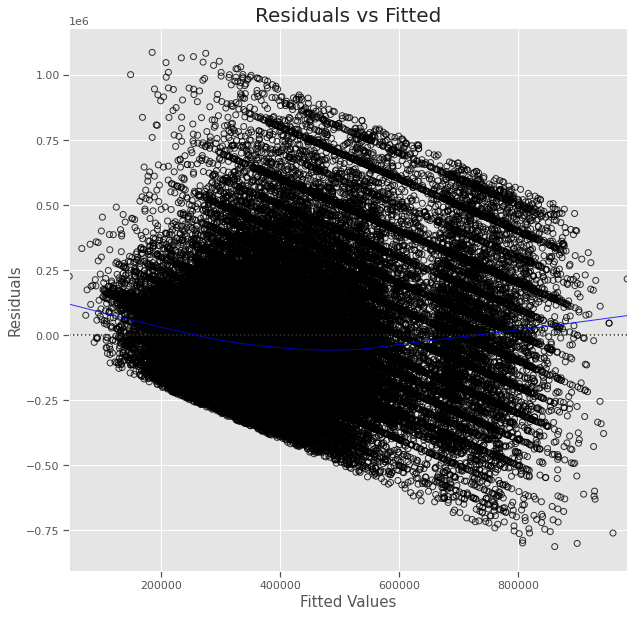

In [ ]:
#Linealidad
sns.residplot(res2.fittedvalues, 'ytrabajocor', data=data2,
                          lowess=True,
                          scatter_kws={'facecolors':'none', 'edgecolors':'black'},
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})

plt.title('Residuals vs Fitted', fontsize=20)
plt.xlabel('Fitted Values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)